In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import randint

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import plot_tree

In [27]:
titanic = pd.read_csv('./train.csv')
df = titanic.copy()

In [28]:
df.columns = map(str.lower, df.columns)
df.rename(columns={'passengerid':'passengerId'}, inplace=True)
df.fare = df.fare.round(2)
cat_col = ['name', 'sex', 'ticket', 'cabin', 'embarked']
    
for col in cat_col:
    df[col] = df[col].astype('category')
    
mean = df.age.mean()
df.age.fillna(mean, inplace=True)
df.age = df.age.astype(int)
df.dropna(subset='embarked', inplace=True)
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [29]:
np.random.seed(42)

# Split data into X and y
X = df.drop(['name', 'survived', 'ticket', 'cabin'], axis=1)
y = df.survived

# Split the data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
cat_features = ['sex', 'embarked']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, cat_features)], 
                                remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 0.  ,  1.  ,  0.  , ...,  1.  ,  0.  ,  7.25],
       [ 1.  ,  0.  ,  1.  , ...,  1.  ,  0.  , 71.28],
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  7.92],
       ...,
       [ 1.  ,  0.  ,  0.  , ...,  1.  ,  2.  , 23.45],
       [ 0.  ,  1.  ,  1.  , ...,  0.  ,  0.  , 30.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  7.75]])

In [31]:
np.random.seed(42)

# Split data into X and y
X = df.drop(['name', 'survived', 'ticket', 'cabin'], axis=1)
y = df.survived

# Split the data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [32]:
tree = DecisionTreeClassifier()

In [33]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
tree.score(X_test,y_test)

0.7471910112359551

In [40]:
# Setup the parameters and distributions to sample from: param_dist
param_dict = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [41]:
tree_rs = RandomizedSearchCV(tree, param_distributions=param_dict, cv=10) 

In [42]:
tree_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f35ca47b3d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f35ca478b50>})

In [43]:
tree_rs.score(X_test, y_test)

0.797752808988764

[Text(0.5753968253968254, 0.96875, 'X[0] <= 0.5\ngini = 0.472\nsamples = 711\nvalue = [440, 271]'),
 Text(0.34350198412698413, 0.90625, 'X[10] <= 26.27\ngini = 0.316\nsamples = 472\nvalue = [379, 93]'),
 Text(0.1453373015873016, 0.84375, 'X[7] <= 13.5\ngini = 0.232\nsamples = 336\nvalue = [291, 45]'),
 Text(0.04365079365079365, 0.78125, 'X[5] <= 67.0\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.03571428571428571, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.051587301587301584, 0.71875, 'X[9] <= 0.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.04365079365079365, 0.65625, 'X[7] <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03571428571428571, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.051587301587301584, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05952380952380952, 0.65625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.24702380952380953, 0.78125, 'X[5] <= 458.0\ngini = 0.188\nsamples = 323\nvalu

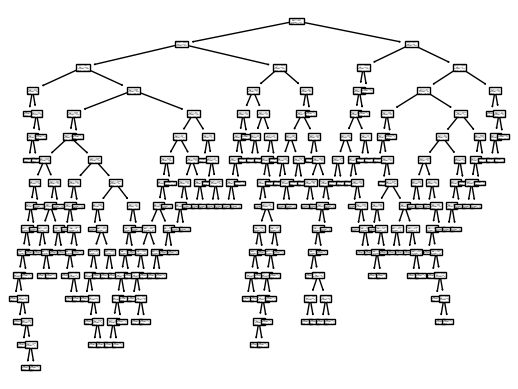

In [53]:
plot_tree(tree)